<a href="https://colab.research.google.com/github/MaryamAshraff2/unsupervised-housing-clustering/blob/main/dbscan_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.cluster import DBSCAN
from IPython import get_ipython
from IPython.display import display

In [2]:
from google.colab import files
uploaded = files.upload()
filename = next(iter(uploaded))
df = pd.read_csv(filename)

Saving spiral2 - spiral2.csv to spiral2 - spiral2 (2).csv


In [3]:
display(df)

,x,y,color
0,281.762010,186.024837,1
1,212.503675,199.031585,0
2,180.014894,259.379059,0
3,302.372404,284.465182,0
4,328.759727,176.945517,1
...,...,...,...
9320,303.398150,333.477029,0
9321,308.020662,320.375773,0
9322,326.646391,205.701014,1
9323,397.409261,178.919871,1


In [4]:
# Display basic information
display(df.info())
# Display descriptive statistics
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9325 entries, 0 to 9324
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       9325 non-null   float64
 1   y       9325 non-null   float64
 2   color   9325 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 218.7 KB


None

,x,y,color
count,9325.000000,9325.000000,9325.000000
mean,278.456979,216.255887,0.492225
std,59.955648,63.867030,0.499966
min,156.931211,87.326660,0.000000
25%,228.888277,165.781139,0.000000
50%,273.745596,215.391483,0.000000
75%,328.882058,265.487807,1.000000
max,412.547345,351.077533,1.000000


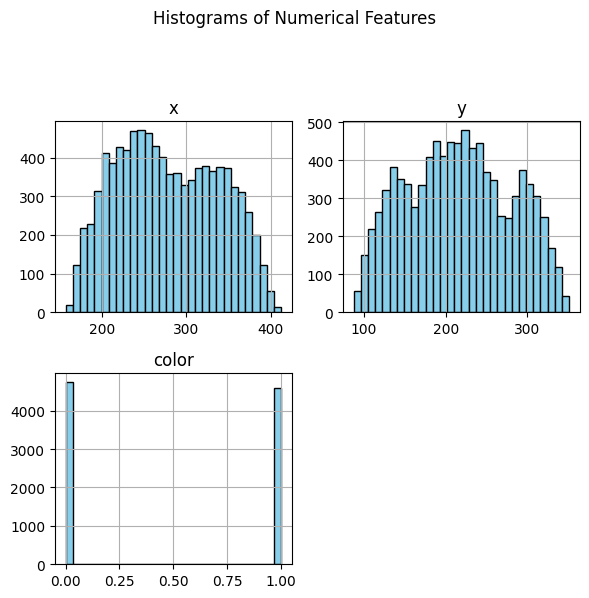

In [5]:
# Plotting histograms for numerical features
df.hist(bins=30, figsize=(6, 6), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

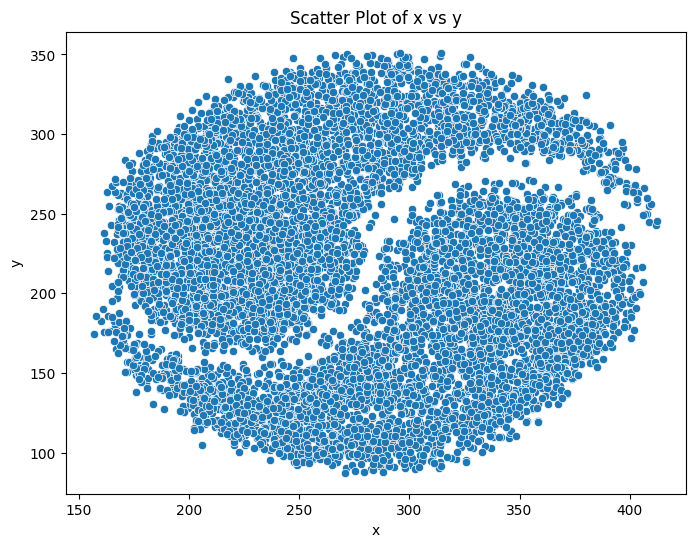

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['x'], y=df['y'])
plt.title('Scatter Plot of x vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Data Preprocessing**

In [10]:
# Identify categorical and numerical features
categorical_features = df.select_dtypes(include=['object'])
numerical_features = df.select_dtypes(exclude=['object'])
# Handle missing values in numerical features (e.g., using mean imputation)
for col in numerical_features.columns:
    df[col].fillna(df[col].mean(), inplace=True)
# Handle missing values in categorical features (e.g., using mode imputation)
for col in categorical_features.columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
# Convert categorical features to numerical using one-hot encoding
df = pd.get_dummies(df, columns=categorical_features.columns, drop_first=True)
# Scale numerical features (e.g., using StandardScaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_features.columns] = scaler.fit_transform(df[numerical_features.columns])

In [11]:
# Display the preprocessed dataframe
display(df.head())

,x,y,color
0,0.055128,-0.473369,1.015672
1,-1.100094,-0.269705,-0.984569
2,-1.642003,0.675239,-0.984569
3,0.398907,1.068046,-0.984569
4,0.839044,-0.615536,1.015672


In [12]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9325 entries, 0 to 9324
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       9325 non-null   float64
 1   y       9325 non-null   float64
 2   color   9325 non-null   float64
dtypes: float64(3)
memory usage: 218.7 KB


None

In [13]:
display(df.describe())

,x,y,color
count,9.325000e+03,9.325000e+03,9.325000e+03
mean,-4.320405e-16,8.648429e-17,7.162576e-17
std,1.000054e+00,1.000054e+00,1.000054e+00
min,-2.027036e+00,-2.018822e+00,-9.845694e-01
25%,-8.268005e-01,-7.903523e-01,-9.845694e-01
50%,-7.858536e-02,-1.353516e-02,-9.845694e-01
75%,8.410848e-01,7.708916e-01,1.015672e+00
max,2.236613e+00,2.111087e+00,1.015672e+00


**Select Features for Clustering and Normalize the Data**

In [15]:
features_for_clustering = ['x', 'y']

# Create a new DataFrame containing only the selected features
X = df[features_for_clustering]

print("Selected Features for Clustering:")
display(X.head())
display(X.info())
display(X.describe())

Selected Features for Clustering:


,x,y
0,0.055128,-0.473369
1,-1.100094,-0.269705
2,-1.642003,0.675239
3,0.398907,1.068046
4,0.839044,-0.615536


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9325 entries, 0 to 9324
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       9325 non-null   float64
 1   y       9325 non-null   float64
dtypes: float64(2)
memory usage: 145.8 KB


None

,x,y
count,9.325000e+03,9.325000e+03
mean,-4.320405e-16,8.648429e-17
std,1.000054e+00,1.000054e+00
min,-2.027036e+00,-2.018822e+00
25%,-8.268005e-01,-7.903523e-01
50%,-7.858536e-02,-1.353516e-02
75%,8.410848e-01,7.708916e-01
max,2.236613e+00,2.111087e+00


In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled array back to a DataFrame (optional, but can be helpful for subsequent steps)
X_scaled = pd.DataFrame(X_scaled, columns=features_for_clustering, index=X.index)

print("\nScaled Features for Clustering:")
display(X_scaled.head())
display(X_scaled.info())
display(X_scaled.describe())


Scaled Features for Clustering:


,x,y
0,0.055128,-0.473369
1,-1.100094,-0.269705
2,-1.642003,0.675239
3,0.398907,1.068046
4,0.839044,-0.615536


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9325 entries, 0 to 9324
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       9325 non-null   float64
 1   y       9325 non-null   float64
dtypes: float64(2)
memory usage: 145.8 KB


None

,x,y
count,9.325000e+03,9.325000e+03
mean,1.295359e-17,2.190681e-17
std,1.000054e+00,1.000054e+00
min,-2.027036e+00,-2.018822e+00
25%,-8.268005e-01,-7.903523e-01
50%,-7.858536e-02,-1.353516e-02
75%,8.410848e-01,7.708916e-01
max,2.236613e+00,2.111087e+00


**Apply DBSCAN and Visualize Clusters**

In [17]:
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
clusters = dbscan.fit_predict(X_scaled)

In [18]:
df['DBSCAN_Cluster'] = clusters

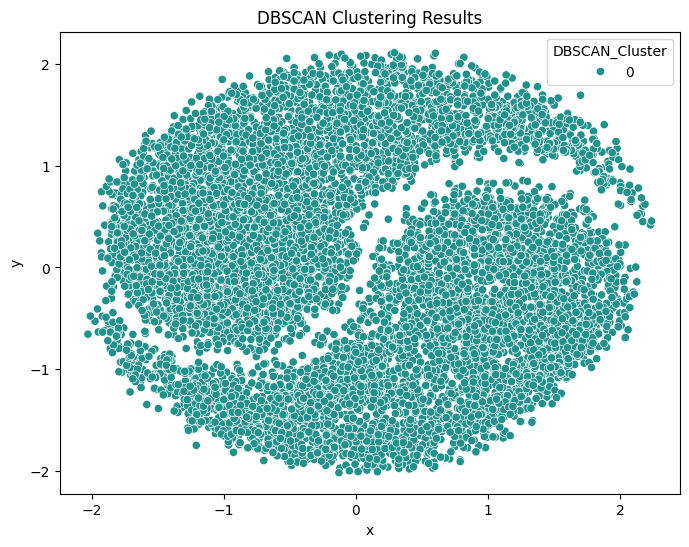

In [19]:
if len(features_for_clustering) == 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=features_for_clustering[0], y=features_for_clustering[1], hue='DBSCAN_Cluster', data=df, palette='viridis', legend='full')
    plt.title('DBSCAN Clustering Results')
    plt.xlabel(features_for_clustering[0])
    plt.ylabel(features_for_clustering[1])
    plt.show()

In [20]:
display(df.head())
display(df['DBSCAN_Cluster'].value_counts())

,x,y,color,DBSCAN_Cluster
0,0.055128,-0.473369,1.015672,0
1,-1.100094,-0.269705,-0.984569,0
2,-1.642003,0.675239,-0.984569,0
3,0.398907,1.068046,-0.984569,0
4,0.839044,-0.615536,1.015672,0


,count
DBSCAN_Cluster,
0,9325
